<a href="https://colab.research.google.com/github/MolecularFoundry/crucible-analysis-notebooks/blob/main/dvs-analysis/basic-analysis-DVS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dsname = "/home/morgan/Git/foundry-data-saver/test-data/ciwe/dvs/40um_bicarbonate_singleramp/discreet/Anyka_25C_8hrHold_preheat-VersogenBC 40um-2024-05-13 08-40-33.xls"

In [ ]:
tmp = pd.read_excel(dsname,
       sheet_name = "DVS Data",
       index_col = 0,
       header= None,
       usecols= [0,1])

num_rows = tmp.loc['Data Start Row:', 1]
df = pd.read_excel(dsname, sheet_name = "DVS Data",
                   skiprows = (num_rows - 2)) #(header will one be before data start row and don't skip it : ))


In [ ]:
df.columns

Index(['Time [minutes]', 'Mass [mg]', 'Delta Mass [%]', 'dm/dt [%/minute]',
       'Target Incubator Temp. [celsius]',
       'Measured Incubator Temp. [celsius]',
       'Target Preheater Temp. [celsius]',
       'Measured Preheater Temp. [celsius]', 'Sorption Temp. [celsius]',
       'Target Partial Pressure (Solvent A) [%]',
       'Measured Partial Pressure (Solvent A) [%]',
       'Target Partial Pressure (Solvent B) [%]',
       'Measured Partial Pressure (Solvent B) [%]', 'Total Gas Flow [sccm]',
       'Target Wet Gas Flow (Solvent A) [sccm]',
       'Actual Wet Gas Flow (Solvent A) [sccm]',
       'Target Dry Gas Flow (Solvent A) [sccm]',
       'Actual Dry Gas Flow (Solvent A) [sccm]',
       'Target Wet Gas Flow (Solvent B) [sccm]',
       'Actual Wet Gas Flow (Solvent B) [sccm]',
       'Target Dry Gas Flow (Solvent B) [sccm]',
       'Actual Dry Gas Flow (Solvent B) [sccm]', 'dm (%) - ref',
       'User Defined 1', 'User Defined 2', 'Unnamed: 25',
       'Target PP/100 (So

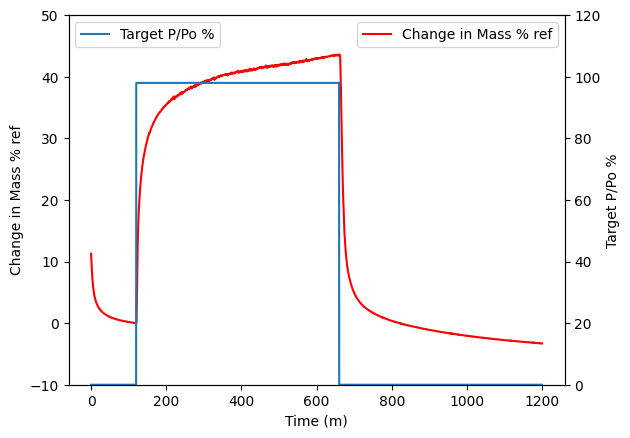

In [ ]:
fig,ax = plt.subplots()
ax.plot(df['Time [minutes]'], df['dm (%) - ref'], "r", label = 'Change in Mass % ref')
ax.set_xlabel("Time (m)")
ax.set_ylabel("Change in Mass % ref")
ax.set_ylim([-10,50])
ax2 = ax.twinx()
ax2.plot(df['Time [minutes]'], df['Target Partial Pressure (Solvent A) [%]'], label = 'Target P/Po %')
ax2.set_ylabel("Target P/Po %")
ax2.set_ylim([0,120])

ax.legend(loc = 0)
ax2.legend(loc = 2)